In [193]:
# Import dependencies - run this first
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
from scipy.integrate import simps
from numpy import trapz
import matplotlib as mpl
from matplotlib import rc, rcParams

Text(0.5, 0, '!!!Ariaaaal')

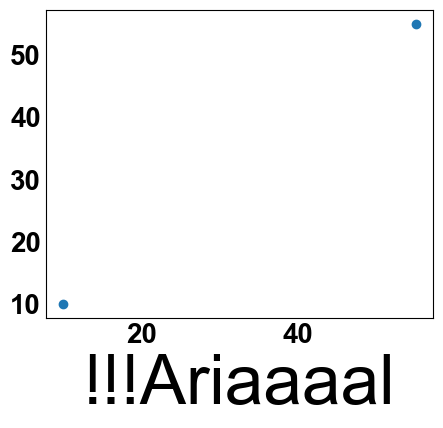

In [194]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

Imax:  288.0741
peak_index (array([76481]),)
x peak 3.833021
the first index max happen:  76481
Mean baseline current:  -1.848576589794
Peak Current:  288.0741
Area:  15.224653598803574
Pulse Time:  483.2499999999995 milliseconds
Final current:  18.616676589794
[10.97425059 10.21000859 12.88485659 ...  9.44576659 10.97425059
 10.21000859]


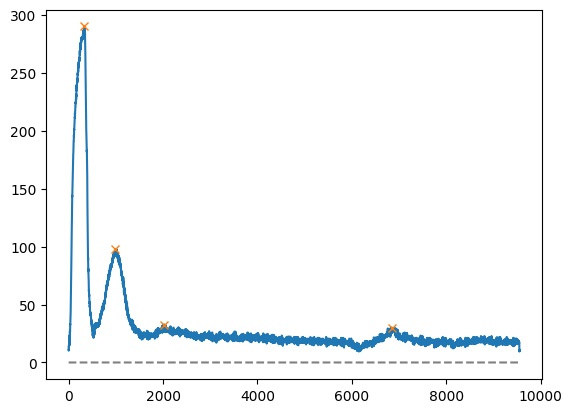

Number of local maxima:  4


In [120]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filename = '38 6C.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)
Imax = max(b)
print ('Imax: ', Imax)
# X position
peak_index = np.where(b==Imax)
print ('peak_index', peak_index)
# throw away extra 
peak_index = peak_index[0]
# grab the first position
x_peak = a[peak_index[0]]
print('x peak', x_peak)
peak_index = int(peak_index[0])
print ('the first index max happen: ', peak_index)

# Define noise
if x_peak > 0.5: 
    mean = np.mean(b[range(0, 10000)])
    noise = np.std(b[range(0, 10000)])
else: 
    mean = np.mean(b[range(50000, 60000)])
    noise = np.std(b[range(50000, 60000)])
    
print('Mean baseline current: ', mean)
b = np.subtract(b, mean)
# Define discharge region
discharge_index = []
for i in range(peak_index-20000, peak_index+50000):
    while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
        if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
            discharge_index = np.append(discharge_index, i)
        break

discharge_index = np.asfarray(discharge_index)
discharge_index = discharge_index.astype(int)
# print(discharge_index)
discharge_time = a[discharge_index]
discharge_current = b[discharge_index]

print("Peak Current: ", Imax)
# Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
area = trapz(discharge_current, dx=0.00005)
area_simps = simps(discharge_current, dx=0.00005)
print("Area: ", area)

# Calculate discharge time
pulseTime = max(discharge_time) - min(discharge_time)
print("Pulse Time: ", pulseTime*1000, 'milliseconds')

# Catch end current
I_Final = discharge_current[len(discharge_current)-1000]
print('Final current: ', I_Final)

from scipy.signal import find_peaks

print(discharge_current)
x = discharge_current
peaks, _ = find_peaks(x, height=0, distance=100, width=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

# Find number of peaks
peak_count = len(peaks)
print("Number of local maxima: ", peak_count)

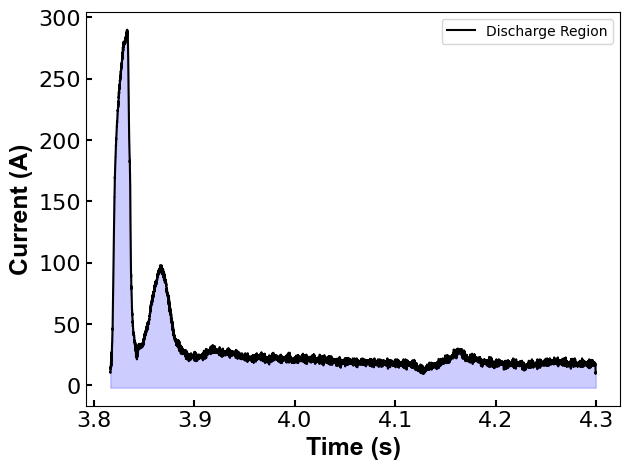

In [160]:
# Plot a single Raman spectrum

filename = '38 6C.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
#ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

NameError: name 'mpl' is not defined

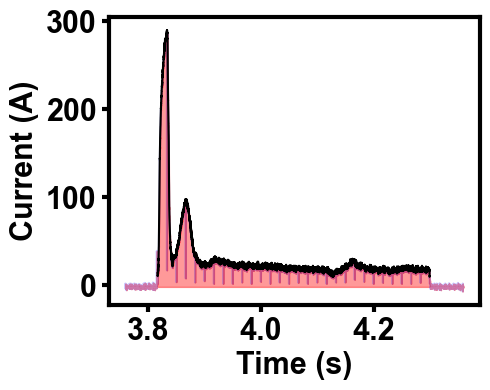

In [198]:
#plt.plot(a, d, color='red', alpha=1)
start = 75000
end = 87000
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='22')

plt.plot(a[start:end], b[start:end], color='blue', alpha=0.2,)
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
plt.fill_between(a[start:end], b[start:end], y2=-2, color='red', alpha=0.4)
ax.set_xlabel('Time (s)', fontname="Arial", fontsize="22", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="22", fontweight = "bold", labelpad=5)

[i.set_linewidth(3) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=500) # Change file name

Text(0, 0.5, 'Current (A)')

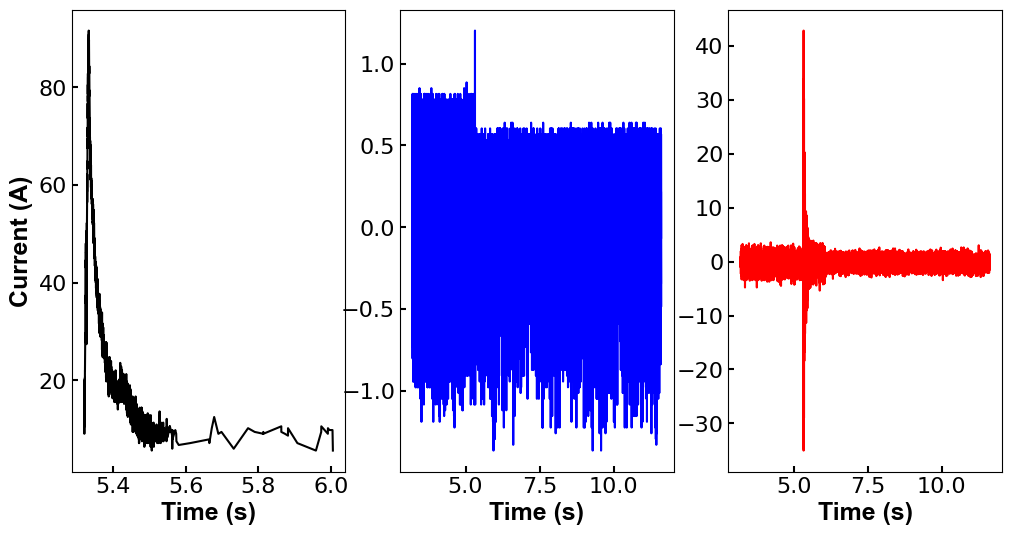

In [111]:
# Plot a single Raman spectrum

# Plot style
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[12,6])
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax1.set_xlim(4, 6)
ax2.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax2.set_xlim(4, 6)
ax3.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax3.set_xlim(4, 6)

# Plot
#ax1.plot(a, b, color='red')
ax1.plot(discharge_time, discharge_current, color='black')
ax2.plot(a, c, color='blue')
ax3.plot(a, d, color='red')

ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax2.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax3.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax1.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

In [64]:
discharge_current

array([10.24554585, 10.24554585,  9.86342485, ...,  9.86342485,
       10.62766685, 10.24554585])

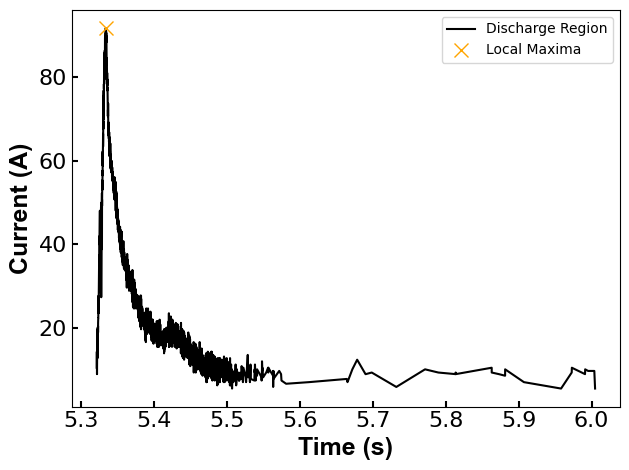

In [94]:
# Plot a single Raman spectrum

filename = '7 13D.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', 
        label='Local Maxima', linestyle='none')
#ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [29]:
a.shape

(168000,)

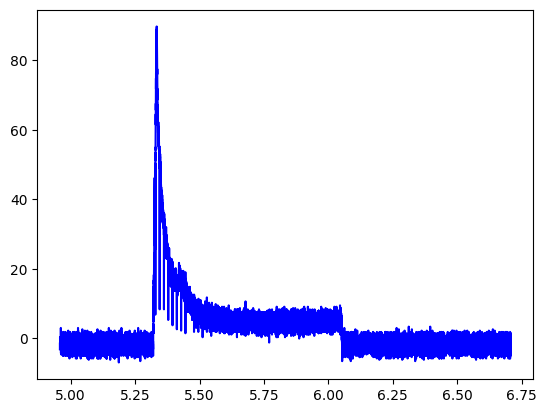

In [96]:
plt.plot(a[35000:70000], b[35000:70000], color='blue', label='Raw Data')

In [97]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
txt_files = glob.glob("./*.txt")
print(txt_files)
print(len(txt_files))

['./11 17C.txt', './18 22C.txt', './21 25C.txt', './52 4G.txt', './101 pa44.txt', './88 pa31.txt', './99 pa41.txt', './137 t2.txt', './70 mc28.txt', './176 tcb20.txt', './102 pa45.txt', './25 2C.txt', './139 t4.txt', './57 mc1.txt', './8 14C.txt', './100 pa42.txt', './94 pa5.txt', './121 mc49.txt', './22 27C.txt', './115 mc43.txt', './60 mc13.txt', './71 mc29.txt', './2 10E.txt', './49 1G.txt', './173 tcb17.txt', './148 t14.txt', './108 pa52.txt', './149 t15.txt', './169 tcb9.txt', './54 6G.txt', './58 mc10.txt', './39 6E.txt', './111 pa55.txt', './130 mc59.txt', './134 mc2.txt', './147 t12.txt', './83 pa19.txt', './161 t28.txt', './7 13D.txt', './89 pa33.txt', './1 10C.txt', './151 t18.txt', './158 t25.txt', './85 pa21.txt', './155 t22.txt', './127 mc56.txt', './179 tcb25.txt', './24 29C.txt', './154 t21.txt', './156 t23.txt', './51 3G.txt', './143 t8.txt', './120 mc48.txt', './131 mc60.txt', './152 t19.txt', './113 pa2.txt', './9 15D.txt', './105 pa48.txt', './133 mc62.txt', './27 2F

In [98]:
def process_ITcurve(filename):
    print(filename)
    # Extract metrics
    a, b, c, d = np.loadtxt(filename, unpack=True)
    
    # Define maximum
    Imax = max(b)
    # X position
    peak_index = np.where(b==Imax) # Find index of max
    peak_index = peak_index[0]
    x_peak = a[peak_index[0]]
    peak_index = int(peak_index[0])
    
    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    # Subtract the baseline current
    b = np.subtract(b, mean)
        
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break
    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    # area_simps = simps(discharge_current, dx=0.00005)
    # print("Area: ", area)
    # print(area_simps)
    
    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    # print("Pulse Time: ", pulseTime)
    
    # Catch end current
    I_Final = discharge_current[len(discharge_current)-70]

    from scipy.signal import find_peaks

    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    # Find number of peaks
    peak_count = len(peaks)

    # Assimilate
    current_stats = [Imax, np.mean(discharge_current), area, pulseTime, I_Final, peak_count]
    return current_stats

In [15]:
# Pull text files, assemble into statistics
big_stats = np.asarray([])

for i in range(0, len(txt_files)):
    filename = txt_files[i]
    stats = process_ITcurve(filename)
    stats = np.append(filename, stats)
    print(stats)
    if len(big_stats) == 0:
        big_stats = np.append(big_stats, stats)
    else:
        big_stats = np.vstack((big_stats, stats))
print(big_stats)

./11 17C.txt
['./11 17C.txt' '290.3668' '31.944407374867097' '15.245016469716532'
 '0.48309999999999986' '16.68141977581' '1.0']
./18 22C.txt
['./18 22C.txt' '170.3808' '38.3853313709341' '12.689660111727383'
 '0.3346' '20.543937068605' '2.0']
./21 25C.txt
['./21 25C.txt' '212.032' '51.49527182176154' '17.96107798239928' '0.4417'
 '8.310217622937' '3.0']
./52 4G.txt
['./52 4G.txt' '168.4702' '74.13467930862907' '6.742073315580042'
 '0.09190000000000031' '35.308530295435' '1.0']
./101 pa44.txt
['./101 pa44.txt' '269.3502' '107.21208978018394' '18.536512024117336'
 '0.17415000000000003' '24.832947529461002' '1.0']
./88 pa31.txt
['./88 pa31.txt' '401.5641' '79.09896253913946' '19.533044690223967'
 '0.2538' '9.455357830494' '3.0']
./99 pa41.txt
['./99 pa41.txt' '332.018' '109.74184260371881' '18.924321741339504'
 '0.17384999999999984' '30.375760436134' '2.0']
./137 t2.txt
['./137 t2.txt' '221.585' '67.89254649460887' '11.514141344978992'
 '0.17100000000000026' '14.422622133465' '1.0']
./70

['./171 tcb11.txt' '237.6341' '66.08973691473743' '24.098969352864284'
 '0.36819999999999986' '15.930171894444' '3.0']
./150 t16.txt
['./150 t16.txt' '271.2608' '36.237638358873895' '12.421744269352445'
 '0.34594999999999976' '14.757598390525' '4.0']
./38 6C.txt
['./38 6C.txt' '288.0741' '31.861846197097556' '15.224653598803574'
 '0.4832499999999995' '17.088186589794002' '4.0']
./46 8E.txt
['./46 8E.txt' '65.6796' '27.264901792444714' '8.67928053822022'
 '0.3210000000000015' '14.413336591094' '4.0']
./32 4D.txt
['./32 4D.txt' '101.9811' '39.742928284735946' '5.036915596717613'
 '0.1277499999999998' '49.560805953374995' '3.0']
./93 pa4.txt
['./93 pa4.txt' '247.1871' '129.12367654024686' '11.781903438746077'
 '0.09159999999999968' '52.190451029014' '1.0']
./44 8C.txt
['./44 8C.txt' '217.3817' '42.687386726726686' '19.83842108572965'
 '0.4788000000000001' '10.264728331568001' '2.0']
./82 pa18.txt
['./82 pa18.txt' '210.1214' '60.30044288300217' '17.622351393573254'
 '0.3130499999999996' '8

['./41 7D.txt' '121.4693' '32.83178308972803' '6.779300060033613'
 '0.20845000000000002' '12.128870404498' '5.0']
./145 t10.txt
['./145 t10.txt' '192.9259' '41.320071486795335' '16.967499216327855'
 '0.4139499999999998' '21.315819493005' '5.0']
./37 5F.txt
['./37 5F.txt' '244.5123' '27.59761602683521' '18.20993888791408'
 '0.7414499999999999' '10.591097862707' '4.0']
./6 13C.txt
['./6 13C.txt' '141.3396' '62.58874420562054' '11.318662112293833'
 '0.18259999999999987' '28.205233852842' '8.0']
./64 mc22.txt
['./64 mc22.txt' '445.1259' '129.50400046126003' '21.542541230298365'
 '0.1695000000000002' '7.838565644909' '1.0']
./165 tcb4.txt
['./165 tcb4.txt' '237.6341' '53.5499658793028' '16.88104195673809'
 '0.31844999999999946' '17.809667242348' '1.0']
./95 pa37.txt
['./95 pa37.txt' '286.5456' '52.07479462862412' '16.301536661892726'
 '0.31510000000000016' '21.592750461079' '1.0']
./157 t24.txt
['./157 t24.txt' '359.5307' '48.861182600773304' '12.412623609361033'
 '0.2559499999999999' '14.4

In [100]:
# Create an Excel worksheet
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('IT_Features_All.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Write some data headers.
worksheet.write('A1', 'Filename', bold)
worksheet.write('B1', 'Peak Current', bold)
worksheet.write('C1', 'Mean Current', bold)
worksheet.write('D1', 'Area Under Curve', bold)
worksheet.write('E1', 'Pulse Time', bold)
worksheet.write('F1', 'Final Current', bold)
worksheet.write('G1', 'Local Maxima', bold)

# Start from the first cell. Rows and columns are zero indexed.
row = 1
col = 0

for filename, Imax, Imean, Area, PulseTime, Ifinal, LocMax in (big_stats):
    worksheet.write(row, col, filename)
    worksheet.write(row, col+1, float(Imax))
    worksheet.write(row, col + 2, float(Imean))
    worksheet.write(row, col + 3, float(Area))
    worksheet.write(row, col + 4, float(PulseTime))
    worksheet.write(row, col + 5, float(Ifinal))
    worksheet.write(row, col + 6, float(LocMax))
    row += 1
    
workbook.close()

In [101]:
Imax2 = Imax.strip("2")
Imax2

'377.8726'

In [102]:
float (Imax)

377.8726

In [103]:
x = 'ddffd'
x2 = x.strip('d')
x2

'ff'